In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [17]:
df = pd.read_csv('/content/electricity_bill_dataset.csv')

In [18]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Summary statistics
print("\nDataset Overview:\n", df.describe())

Missing Values:
 Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

Dataset Overview:
                 Fan  Refrigerator  AirConditioner    Television       Monitor  \
count  45345.000000  45345.000000    45345.000000  45345.000000  45345.000000   
mean      13.990694     21.705458        1.503959     12.502635      2.865057   
std        5.470816      1.672575        1.115482      5.756007      3.894933   
min        5.000000     17.000000        0.000000      3.000000      1.000000   
25%        9.000000     22.000000        1.000000      7.000000      1.000000   
50%       14.000000     22.000000        2.000000     13.000000      1.000000   
75%       19.000000     23.000000        2.000000     17.000000      1.000000   
max       23.000000     23.000000        3.000000 

In [19]:
X = df[['MonthlyHours']].values  # Feature column
y = df['ElectricityBill'].values  # Target column

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [22]:
y_pred = model.predict(X_test)


In [23]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 96855.21
Mean Absolute Error (MAE): 259.05
R² Score: 0.91


In [24]:
print(f"\nModel Depth: {model.get_depth()}")
print(f"Number of Leaves: {model.get_n_leaves()}")


Model Depth: 17
Number of Leaves: 737


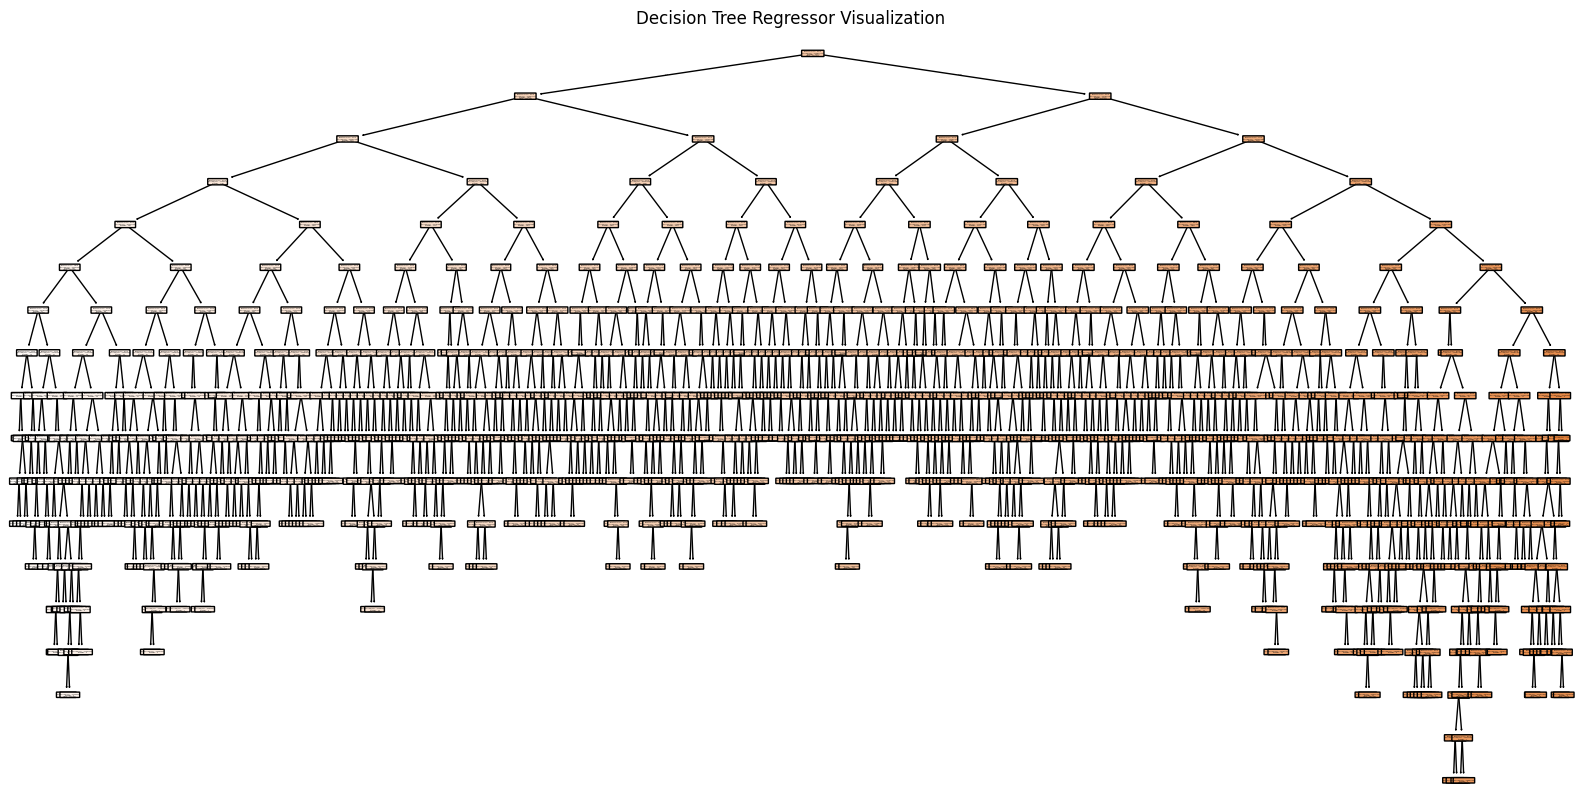

In [25]:
#  Plot the Decision Tree (no error now)
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=['MonthlyHours'], rounded=True)
plt.title("Decision Tree Regressor Visualization")
plt.show()

In [27]:
import numpy as np
from collections import Counter
from math import log2

# Sample class labels
labels = ['yes', 'no', 'yes', 'yes', 'no', 'yes']

# Function to calculate entropy
def calculate_entropy(labels):
    total = len(labels)
    label_counts = Counter(labels)

    entropy = 0
    for count in label_counts.values():
        probability = count / total
        entropy -= probability * log2(probability)
    return entropy

# Calculate and print entropy
entropy_value = calculate_entropy(labels)
print(f'Entropy: {entropy_value:.4f}')


Entropy: 0.9183
